In [8]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [9]:
DF_US = df[df['job_country'] == 'United States'].copy()
DF_US['salary_year_avg'].dropna(inplace=True)

In [27]:
top_jobs = DF_US['job_title_short'].value_counts().index.to_list()
DF_TOP_6 = DF_US[DF_US['job_title_short'].isin(top_jobs[:6])]
job_order = DF_TOP_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

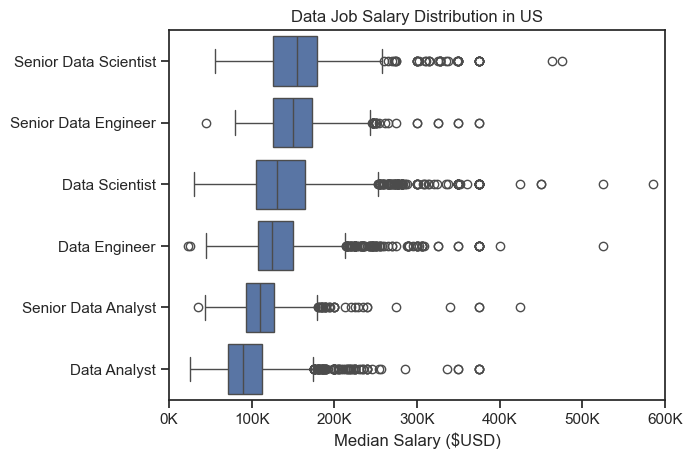

In [38]:
sns.set_theme(style='ticks')
sns.despine()
sns.boxplot(data=DF_TOP_6,x='salary_year_avg',y='job_title_short',order=job_order)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f"{int(x/1000)}K"))
plt.xlim(0,600000)
plt.title('Data Job Salary Distribution in US')
plt.ylabel('')
plt.xlabel('Median Salary ($USD)')
plt.show()
